In [37]:
from initializer import Initializer
from data_bags import *
from crossover import *
from mutation import *
from quixo_game import *
import random
from gp_player import GeneticProgrammingPlayer
from quixo.my_random_player import MyRandomPlayer
from population import Population

In [38]:
init_param = InitParameters(
    use_different_depth=True, 
    use_grow=True,
    use_full=True, 
)
agent_param = AgentParameters(
    max_depth=3,
)
player_param = PlayerParameters(
    enable_random_move=True,
    loop_avoidance_limit=5
)
pop_param = PopulationParameters(
    agent_param=agent_param,
    init_param=init_param,
    player_param=player_param,
    population_size=2,
    tournament_depth=1,
    selection_size=4,
    propagate_best=True
)

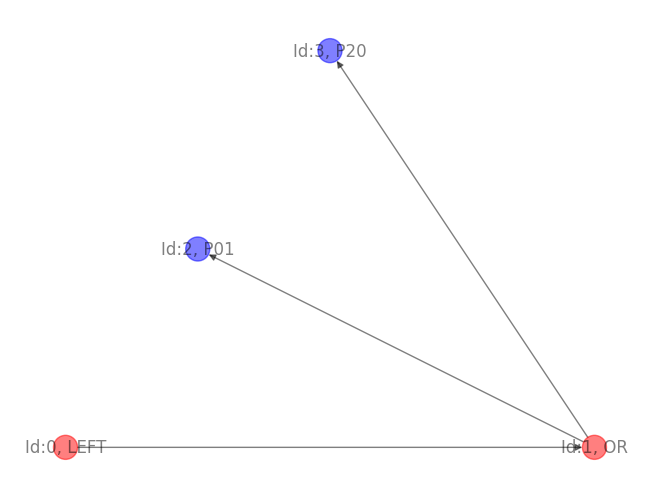

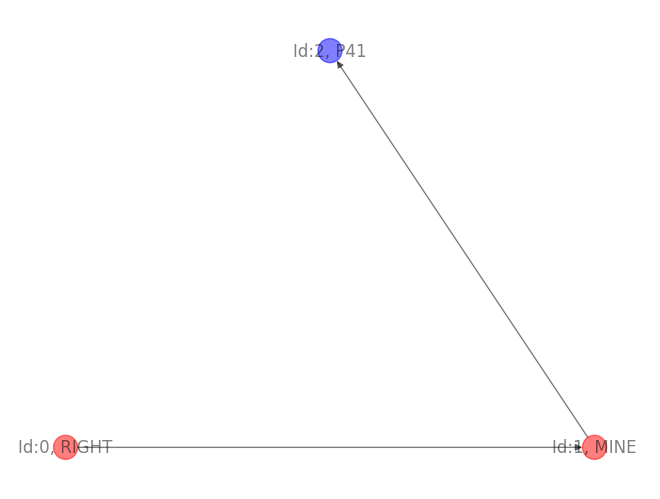

In [39]:
population = Population(population_param=pop_param)
population.initialize()
for i in population.individuals:
    i.print_graph()

In [40]:
w = QuixoGame().play(GeneticProgrammingPlayer(population.individuals[0]), GeneticProgrammingPlayer(population.individuals[1]))

In [41]:
print(population.individuals[w])

Individual 0, {<0, LEFT>: {<1, OR>: {}}, <1, OR>: {<2, P01>: {}, <3, P20>: {}}, <2, P01>: {}, <3, P20>: {}}


In [42]:
population.selection()

Tournament 0: [I_1, I_1]
W: 0
Tournament 0 WINNER: I_1
Tournament 1: [I_1, I_1]
W: 0
Tournament 1 WINNER: I_1
Tournament 2: [I_0, I_1]
W: 0
Tournament 2 WINNER: I_0
Tournament 3: [I_0, I_1]
W: 0
Tournament 3 WINNER: I_0
Best: I_0
Selected: [I_1, I_1, I_0, I_0]
